In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/samsung-mobiles-latest-dataset/samsung_mobile_new_data.csv
/kaggle/input/samsung-mobiles-latest-dataset/samsungMobilesData.csv


# Importing the libraries 

In [2]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Loading the datsets as dataframes

In [3]:
samsung_mobile_new_data = pd.read_csv('/kaggle/input/samsung-mobiles-latest-dataset/samsung_mobile_new_data.csv')
samsungMobilesData = pd.read_csv('/kaggle/input/samsung-mobiles-latest-dataset/samsungMobilesData.csv')

# Exploring the datasets

In [4]:
samsung_mobile_new_data.head()

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,"₹9,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,"₹10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,"₹15,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBTotal Memory128 G...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",Battery Capacity5000 mAh


In [5]:
samsung_mobile_new_data.shape

(576, 10)

In [6]:
samsung_mobile_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          576 non-null    object 
 1   ratings       553 non-null    float64
 2   price         576 non-null    object 
 3   imgURL        576 non-null    object 
 4   storage_ram   570 non-null    object 
 5   os_processor  555 non-null    object 
 6   camera        562 non-null    object 
 7   display       573 non-null    object 
 8   network       565 non-null    object 
 9   battery       573 non-null    object 
dtypes: float64(1), object(9)
memory usage: 45.1+ KB


In [7]:
samsungMobilesData.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [8]:
samsungMobilesData.shape

(407, 11)

In [9]:
samsungMobilesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             407 non-null    object 
 1   ratings          407 non-null    float64
 2   price            407 non-null    int64  
 3   imgURL           407 non-null    object 
 4   camera           407 non-null    int64  
 5   display          407 non-null    object 
 6   battery          407 non-null    int64  
 7   storage          407 non-null    int64  
 8   ram              407 non-null    int64  
 9   processor        407 non-null    object 
 10  android_version  407 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 35.1+ KB


Proceeding with this dataset for the purpose of creating a tensor flow model as the data requires almost no cleaning

# Proceeding with the samsungMobilesData dataset 

In [10]:
samsungMobilesData.isnull().sum()

name               0
ratings            0
price              0
imgURL             0
camera             0
display            0
battery            0
storage            0
ram                0
processor          0
android_version    0
dtype: int64

In [11]:
samsungMobilesData.describe()

,ratings,price,camera,battery,storage,ram,android_version
count,407.00000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,4.19828,17363.245700,43.660934,4946.437346,106.199017,5.493857,10.847666
std,0.17762,6735.647203,25.189978,878.467561,58.899992,2.185789,1.829261
min,2.90000,6490.000000,0.000000,1500.000000,1.000000,1.000000,1.000000
25%,4.10000,11982.500000,20.000000,4500.000000,64.000000,4.000000,10.000000
50%,4.20000,15999.000000,48.000000,5000.000000,128.000000,6.000000,11.000000
75%,4.30000,21744.500000,50.000000,5500.000000,128.000000,6.000000,12.000000
max,4.80000,32000.000000,200.000000,7000.000000,512.000000,12.000000,13.000000


The name and the image url column are almost irrelevant and hence dropping them from the model 

In [12]:
samsungMobilesData.drop(['imgURL','name'],axis = 1 , inplace = True)

In [13]:
samsungMobilesData.head()

,ratings,price,camera,display,battery,storage,ram,processor,android_version
0,4.3,9499,50,other_types,6000,64,4,not mentioned,12
1,4.3,10499,50,other_types,6000,128,4,not mentioned,12
2,4.3,10499,50,other_types,6000,128,4,not mentioned,12
3,4.3,10499,50,other_types,6000,128,4,not mentioned,12
4,4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor,12


# Data Processing

In [14]:
samsungMobilesData['display'].value_counts()

other_types    250
LCD             70
HD+ AMOLED      43
AMOLED          39
TFT              5
Name: display, dtype: int64

In [15]:
samsungMobilesData['android_version'].value_counts()

12    117
11     95
10     75
13     56
9      29
8      15
6       6
7       6
4       3
5       3
1       2
Name: android_version, dtype: int64

In [16]:
samsungMobilesData['processor'].value_counts()

not mentioned              274
MediaTek                    16
Gen8                        14
Dimensity1080,              12
Dimensity700                 9
Snapdragon720GProcessor      8
Snapdragon1P                 8
Snapdragon750GProcessor      7
Heilo80P                     7
Heilo356765                  7
Snapdragon(SDM450-F01)       7
Snapdragon695                5
Snapdragon450P               5
Dimensity720                 4
Snapdragon888                4
Heilo35P                     4
Snapdragon450                4
Snapdragon(SDM439)           4
Heilo806769                  2
Snapdragon750G               2
Snapdragon425P               2
Heilo67653512                1
Snapdragon410                1
Name: processor, dtype: int64

In [17]:
samsungMobilesData['processor'] = samsungMobilesData['processor'].str.replace('Dimensity1080,','Dimensity1080')

In [18]:
samsungMobilesData['processor'].value_counts()

not mentioned              274
MediaTek                    16
Gen8                        14
Dimensity1080               12
Dimensity700                 9
Snapdragon720GProcessor      8
Snapdragon1P                 8
Snapdragon750GProcessor      7
Heilo80P                     7
Heilo356765                  7
Snapdragon(SDM450-F01)       7
Snapdragon695                5
Snapdragon450P               5
Dimensity720                 4
Snapdragon888                4
Heilo35P                     4
Snapdragon450                4
Snapdragon(SDM439)           4
Heilo806769                  2
Snapdragon750G               2
Snapdragon425P               2
Heilo67653512                1
Snapdragon410                1
Name: processor, dtype: int64

In [19]:
samsungMobilesData.head()

,ratings,price,camera,display,battery,storage,ram,processor,android_version
0,4.3,9499,50,other_types,6000,64,4,not mentioned,12
1,4.3,10499,50,other_types,6000,128,4,not mentioned,12
2,4.3,10499,50,other_types,6000,128,4,not mentioned,12
3,4.3,10499,50,other_types,6000,128,4,not mentioned,12
4,4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [20]:
##Encoding of categorical data 

transformed_dataframe = pd.get_dummies(samsungMobilesData, columns = ['display','processor'],drop_first = True)


In [21]:
transformed_dataframe

,ratings,price,camera,battery,storage,ram,android_version,display_HD+ AMOLED,display_LCD,display_TFT,...,processor_Snapdragon410,processor_Snapdragon425P,processor_Snapdragon450,processor_Snapdragon450P,processor_Snapdragon695,processor_Snapdragon720GProcessor,processor_Snapdragon750G,processor_Snapdragon750GProcessor,processor_Snapdragon888,processor_not mentioned
0,4.3,9499,50,6000,64,4,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.3,10499,50,6000,128,4,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.3,10499,50,6000,128,4,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.3,10499,50,6000,128,4,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.3,15499,50,5000,128,6,12,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,4.5,21490,32,3500,128,6,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
403,4.3,16199,25,4000,64,4,12,0,0,0,...,0,0,0,0,0,0,0,0,0,1
404,4.4,9000,13,3300,32,2,8,0,0,0,...,0,1,0,0,0,0,0,0,0,0
405,4.2,10999,13,4000,32,3,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
## Dividing the datset into train and test 

X = transformed_dataframe.drop('price',axis = 1 )
y = transformed_dataframe['price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,train_size = 0.7 , random_state = 42)


In [23]:
### Scaling the datasets
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()

X_train = mmc.fit_transform(X_train)
X_test = mmc.transform(X_test)

Reshaping the training and test data into tensors

import numpy as np 
y_train = [[item] for item in y_train]
y_train = np.reshape(y_train , (-1,1))
print(y_train.shape)

X_train = tf.reshape(X_train,[-1, 284, 32])
y_train = tf.reshape(y_train , [-1,284,1])

X_train.shape

# Creating the model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU ,PReLU , LeakyReLU , ELU 
from tensorflow.keras.layers import Dropout

In [25]:
# creating a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# compiling the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(lr = 0.01), metrics = ['mae'])

# fit the model
model_history = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
9/9 [==============================] - 1s 3ms/step - loss: 17589.4922 - mae: 17589.4922
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 17586.9121 - mae: 17586.9121
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 17578.2793 - mae: 17578.2793
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 17550.8438 - mae: 17550.8438
Epoch 5/500
9/9 [==============================] - 0s 2ms/step - loss: 17470.5332 - mae: 17470.5332
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 17255.5273 - mae: 17255.5273
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 16729.7246 - mae: 16729.7246
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 15518.4805 - mae: 15518.4805
Epoch 9/500
9/9 [==============================] - 0s 3ms/step - loss: 12878.1953 - mae: 12878.1953
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 7911.5562 - mae: 7911.5562
E

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               6600      
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 50)                10050     
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 59,921
Trainable params: 59,921
Non-traina

In [27]:
# Making the predictions on the test data 
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [28]:
y_pred.shape

(123, 1)

In [29]:
y_test.shape
y_test = [[item] for item in y_test]
y_test = np.reshape(y_test , (-1,1))

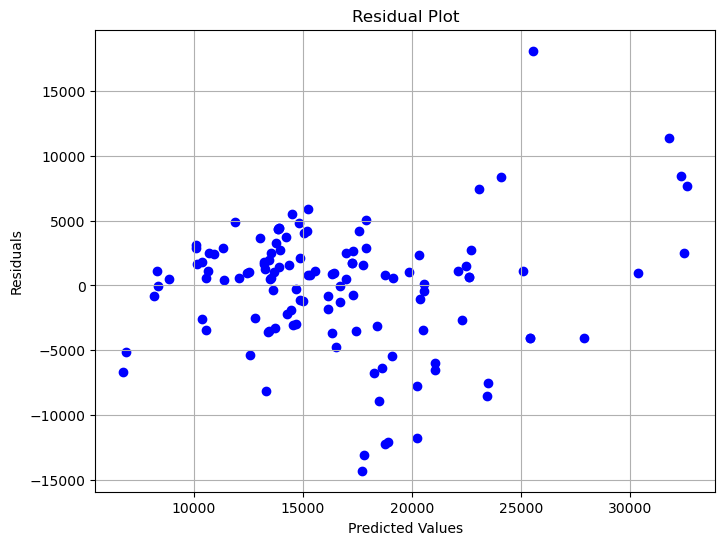

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

res = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred , res ,color = 'blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Creating a denser model

In [31]:
# creating a desnser model using the Sequential API and increasing the number of epochs 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# compiling the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(lr = 0.01), metrics = ['mae'])

# fit the model
model_history = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
9/9 [==============================] - 1s 6ms/step - loss: 17588.7148 - mae: 17588.7148
Epoch 2/1000
9/9 [==============================] - 0s 6ms/step - loss: 17548.0332 - mae: 17548.0332
Epoch 3/1000
9/9 [==============================] - 0s 6ms/step - loss: 16989.4316 - mae: 16989.4316
Epoch 4/1000
9/9 [==============================] - 0s 6ms/step - loss: 12238.3984 - mae: 12238.3984
Epoch 5/1000
9/9 [==============================] - 0s 6ms/step - loss: 6722.8521 - mae: 6722.8521
Epoch 6/1000
9/9 [==============================] - 0s 6ms/step - loss: 5515.0298 - mae: 5515.0298
Epoch 7/1000
9/9 [==============================] - 0s 6ms/step - loss: 4786.9268 - mae: 4786.9268
Epoch 8/1000
9/9 [==============================] - 0s 6ms/step - loss: 4383.6309 - mae: 4383.6309
Epoch 9/1000
9/9 [==============================] - 0s 6ms/step - loss: 4106.9595 - mae: 4106.9595
Epoch 10/1000
9/9 [==============================] - 0s 6ms/step - loss: 3988.7390 - mae: 3988.7390
E

The model performs better with a denser ANN, let us check the residuals

In [32]:
y_pred = model.predict(X_test)


4/4 [==============================] - 0s 3ms/step


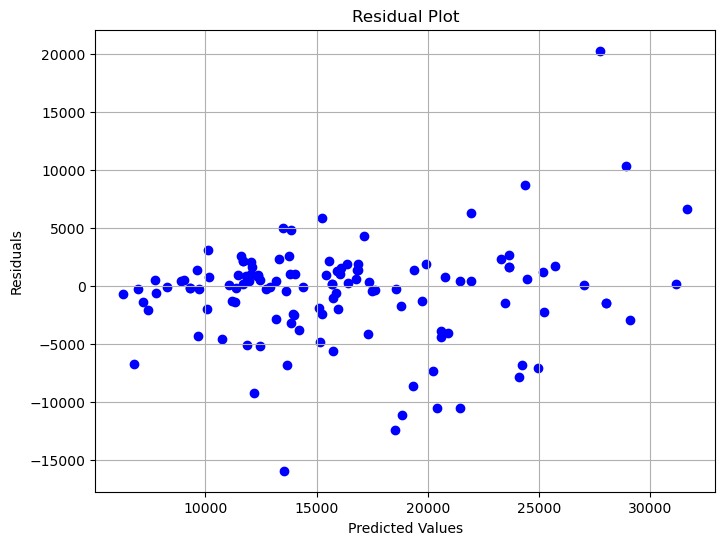

In [33]:
res = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred , res ,color = 'blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

> The model perfroms better as a denser ANN
> I had avoided the other dataset as I wanted this to be a simple Regression using ANN , as I am making my first Neural Network model .
> Suggestions for model improvement invited.
> Thank you for going through this.